# MLP GAN

In [1]:
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K
import keras
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

Using TensorFlow backend.


## The original GAN!

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
n = len(X_train)

This will flatten the image matrices

In [6]:
X_train = X_train.reshape(n, -1).astype(np.float32)
X_test = X_test.reshape(len(X_test), -1).astype(np.float32)

This will convert 0-255 to 0-1

In [7]:
X_train /= 255.; X_test /= 255.

## Training procedure

Create random data for the generator

In [8]:
def noise(batch_size): return np.random.rand(batch_size, 100)

Create a batch of data for the discriminator, some real and some fake

In [9]:
np.random.randint(0,5, size=32)

array([4, 2, 2, 4, 2, 2, 1, 3, 0, 3, 0, 0, 2, 0, 4, 0, 3, 1, 4, 2, 1, 0, 2,
       3, 0, 2, 3, 1, 4, 3, 4, 1])

In [10]:
def data_D(batch_size, G):
    half_batch = batch_size//2
    real_imgs = X_train[np.random.randint(0, n, size=half_batch)]
    X = np.concatenate((real_imgs, G.predict(noise(half_batch))))
    return X, [0]*half_batch + [1]*half_batch

Lock or release weights on a network

In [11]:
def make_trainable(net, val):
    net.trainable = val
    for l in net.layers: l.trainable = val

Train a few epochs, and return the losses for D and G. In each epoch we:
1. Train D on one batch from data_D()
2. Train G to create images that the discriminator predicts as real.

In [12]:
def train(D, G, m, num_epochs=5000, batch_size=128):
    dl, gl = [],[]
    for e in tqdm(range(num_epochs)):
        X,y = data_D(batch_size, G)
        dl.append(D.train_on_batch(X,y))
        make_trainable(D, False)
        gl.append(m.train_on_batch(noise(batch_size), np.zeros([batch_size])))
        make_trainable(D, True)
    return dl,gl

## MLP GAN Model

In [13]:
MLP_G = Sequential([
        Dense(200, input_shape=(100,), activation='relu'),
        Dense(400, activation='relu'),
        Dense(784, activation='sigmoid')
])

In [14]:
MLP_D = Sequential([
        Dense(300, input_shape=(784,), activation='relu'),
        Dense(300, activation='relu'),
        Dense(1, activation='sigmoid')
])

In [15]:
MLP_D.compile(Adam(1e-4), "binary_crossentropy")

MLP_m = Sequential([MLP_G, MLP_D])
MLP_m.compile(Adam(1e-4), "binary_crossentropy")

In [16]:
dl,gl = train(MLP_D, MLP_G, MLP_m, 8000)

100%|██████████| 8000/8000 [01:49<00:00, 73.31it/s]


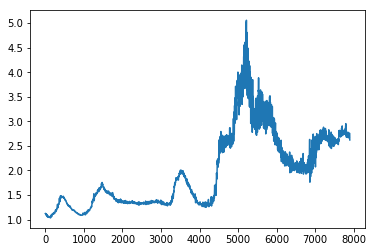

In [17]:
plt.plot(dl[100:])

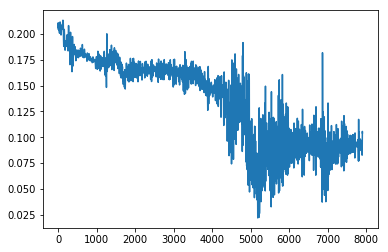

In [18]:
plt.plot(gl[100:])

In [19]:
generated = MLP_G.predict(noise(1)).reshape(1, 28,28)

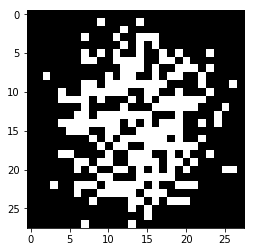

In [22]:
plt.imshow(generated[0], cmap='gray')